# Assignment 3
### Due 9/21. Do four of five.

In [1]:
import urllib.request
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""
    import urllib.request
    import zipfile
    import os
    
    zip_path = 'data.zip'
    data_dir = 'data'
    
    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/16954427/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")
    
    if not os.path.exists(data_dir):
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")
    
    return data_dir

download_data()

'data'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [3]:
NHANES = pd.read_csv('./data/nhanes_data_17_18.csv')
NHANES

C:\Users\shawn\AppData\Local\Temp\ipykernel_23256\1946773738.py:1: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  NHANES = pd.read_csv('./data/nhanes_data_17_18.csv')


,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,102952.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,0.0,Never
8362,102953.0,Fair or,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,218.0,0.0,Never
8363,102954.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,150.0,0.0,Never
8364,102955.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
NHANES['smoke_na'] = NHANES['SmokedTobaccoLast5Days'].isna()
NHANES['smoke_na'].value_counts()

smoke_na
False    5953
True     2413
Name: count, dtype: int64

In [5]:
NHANES['GeneralHealthCondition'].value_counts()

GeneralHealthCondition
Good         2454
Very good    1544
Fair or      1175
Excellent     619
Poor?         172
Name: count, dtype: int64

In [6]:
pd.crosstab(NHANES['smoke_na'], NHANES['GeneralHealthCondition'])

GeneralHealthCondition,Excellent,Fair or,Good,Poor?,Very good
smoke_na,,,,,
False,618,1174,2446,172,1538
True,1,1,8,0,6


In [7]:
pd.crosstab(NHANES['smoke_na'], NHANES['GeneralHealthCondition'], normalize='columns')

GeneralHealthCondition,Excellent,Fair or,Good,Poor?,Very good
smoke_na,,,,,
False,0.998384,0.999149,0.99674,1.0,0.996114
True,0.001616,0.000851,0.00326,0.0,0.003886


In [8]:
NHANES.loc[:,['smoke_na','GeneralHealthCondition']].groupby('GeneralHealthCondition').mean()

,smoke_na
GeneralHealthCondition,
Excellent,0.001616
Fair or,0.000851
Good,0.003260
Poor?,0.000000
Very good,0.003886


From the contingency tables, we see that almost all individuals across every general health condition category have non-missing responses for whether they smoked in the past 5 days. The proportion of missing values is extremely small less than 1% overall, and the normalized table shows that missingness is evenly spread across health condition categories, with no clear pattern of systematic bias.

This suggests that missing data for the smoking variable does not strongly depend on reported general health condition. In other words, people’s likelihood of not answering the smoking question appears to be fairly random, regardless of whether they report excellent, good, fair, or poor health. Thus, there is no meaningful association between missingness in the smoking variable and perceived health status.

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [9]:
NHANES = pd.read_csv('./data/nhanes_data_17_18.csv')
NHANES.head()

C:\Users\shawn\AppData\Local\Temp\ipykernel_23256\2034364400.py:1: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  NHANES = pd.read_csv('./data/nhanes_data_17_18.csv')


,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
NHANES[['GeneralHealthCondition','CurrentSelfreportedWeightPounds']].isna().sum()

GeneralHealthCondition             2402
CurrentSelfreportedWeightPounds    2538
dtype: int64

In [36]:
NHANES.groupby('GeneralHealthCondition')['CurrentSelfreportedWeightPounds'].describe()

,count,mean,std,min,25%,50%,75%,max
GeneralHealthCondition,,,,,,,,
Excellent,500.0,315.410000,1204.831420,90.0,135.0,158.0,185.0,9999.0
Fair or,1134.0,483.822751,1664.206135,86.0,155.0,185.0,225.0,9999.0
Good,2262.0,334.106101,1202.150398,72.0,148.0,175.0,210.0,9999.0
Poor?,169.0,321.798817,1064.212601,95.0,165.0,196.0,240.0,9999.0
Very good,1352.0,238.725592,809.140090,85.0,140.0,165.0,192.0,9999.0


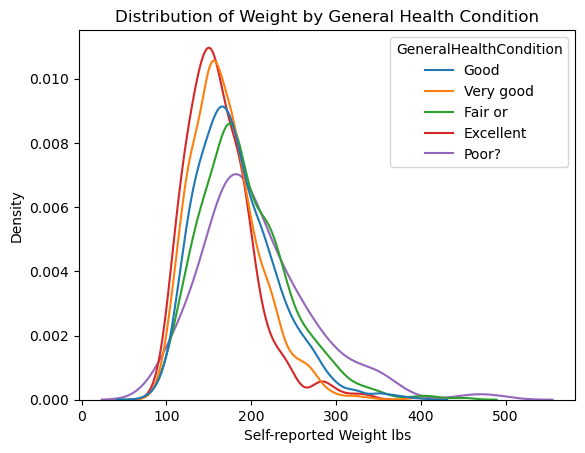

In [13]:
NHANES_clean = NHANES[NHANES['CurrentSelfreportedWeightPounds'] < 2000]

sns.kdeplot(data=NHANES_clean, x='CurrentSelfreportedWeightPounds', 
           hue='GeneralHealthCondition', common_norm=False)
plt.title("Distribution of Weight by General Health Condition")
plt.xlabel("Self-reported Weight lbs")
plt.ylabel("Density")
plt.show()

From the descriptive tables, we see that mean self-reported weight tends to be lower among those who report “Excellent” or “Very good” health, and higher among those who report “Fair” or “Poor” health. The spread (standard deviation) of weights also appears wider in the poorer health categories, suggesting more variability.

The kernel density plots confirm this pattern: the “Excellent” and “Very good” groups have distributions concentrated around moderate weights, while “Fair” and “Poor” groups shift toward higher weight ranges with longer right tails. This suggests a possible relationship where higher body weight is associated with lower self-perceived health condition, although the relationship is not deterministic and distributions overlap across groups.

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

### Answer for Problem 3

We want to find the prediction $\hat{y}(z)$ of $Y$ when $X=z$ by minimizing the weighted mean squared error:

$$
MSE(\hat{y}(z)) = \frac{1}{N} \sum_{i=1}^N \left( y_i - \hat{y}(z) \right)^2 \cdot \frac{1}{h}k\!\left(\frac{z-x_i}{h}\right).
$$

Define weights
Let
$$
w_i(z) = \frac{1}{h}k\!\left(\frac{z-x_i}{h}\right).
$$
Then
$$
MSE(\hat{y}(z)) = \frac{1}{N}\sum_{i=1}^N \big(y_i - \hat{y}(z)\big)^2 w_i(z).
$$


Differentiate with respect to $\hat{y}(z)$
$$
\frac{d}{d\hat{y}(z)} MSE(\hat{y}(z))
= \frac{1}{N}\sum_{i=1}^N 2\big(\hat{y}(z) - y_i\big) w_i(z).
$$

Set derivative to zero:

$$
\sum_{i=1}^N \big(\hat{y}(z) - y_i\big) w_i(z) = 0.
$$


Solve for $\hat{y}(z)$
$$
\hat{y}(z)\sum_{i=1}^N w_i(z) = \sum_{i=1}^N w_i(z)y_i.
$$

So
$$
\hat{y}(z) = \frac{\sum_{i=1}^N w_i(z)y_i}{\sum_{i=1}^N w_i(z)}.
$$


Recognize the estimator
Substituting back $w_i(z)=\tfrac{1}{h}k\!\left(\frac{z-x_i}{h}\right)$ gives:

$$
\hat{y}(z) = \frac{\sum_{i=1}^N K_h(z-x_i)\, y_i}{\sum_{i=1}^N K_h(z-x_i)},
$$

where $K_h(u)=\tfrac{1}{h}k(u/h)$.


This is the Nadaraya–Watson estimator, also known as the Local Constant Least Squares (LCLS) estimator.


4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome

<Axes: xlabel='CurrentSelfreportedWeightPounds', ylabel='Glycohemoglobin'>

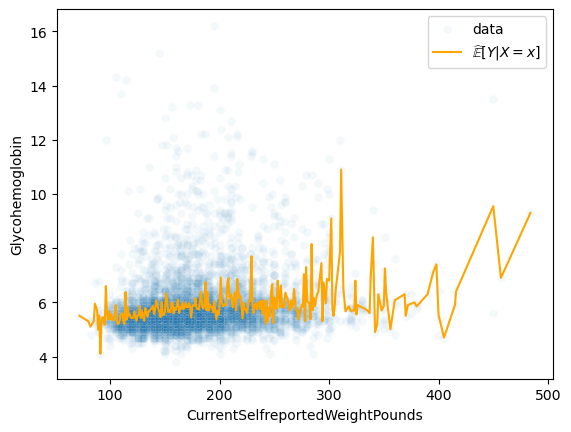

In [14]:
means=NHANES_clean.loc[:,['Glycohemoglobin','CurrentSelfreportedWeightPounds']].groupby('CurrentSelfreportedWeightPounds').mean()

sns.scatterplot(data=NHANES_clean, y='Glycohemoglobin', x='CurrentSelfreportedWeightPounds',alpha=.05, label='data')
sns.lineplot(data=means, x='CurrentSelfreportedWeightPounds',y='Glycohemoglobin',color='orange', label='$\\widehat{\\mathbb{E}}[Y|X=x]$')

From the scatterplot and conditional expectation function (CEF), we observe a positive association between self-reported body weight and glycohemoglobin levels: on average, individuals with higher body weight tend to have higher glycohemoglobin.

However, this relationship is not plausibly causal in a clean sense, because many confounding variables could drive both weight and glycohemoglobin. For example, dietary habits, physical activity, genetics, socioeconomic status, and pre-existing health conditions may all influence both outcomes. Without controlling for these factors, we cannot interpret the relationship as “weight causes higher glycohemoglobin.” These unobserved or unmeasured variables represent threats to causal identification.

That said, even if the relationship is not causal, the estimated CEF still has predictive value. Given a person’s self-reported weight, our model can predict their expected glycohemoglobin level with reasonable accuracy. This predictive relationship holds as long as we are not intervening in the system (e.g., trying to change someone’s glycohemoglobin by manipulating only their weight). In other words, the model is useful for forecasting outcomes conditional on observed data, but not for making policy or clinical claims about the effects of interventions.